In [ ]:
from model import create_basemodel
from overparam.utils import overparameterize
import torch


In [2]:
basemodel = create_basemodel("config.yaml")

In [3]:
basemodel

BaseModel(
  (convblocks): Sequential(
    (0): ConvBlock(
      (conv): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=same)
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (activation): ReLU()
    )
    (1): ConvBlock(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (activation): ReLU()
    )
    (2): ConvBlock(
      (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (activation): ReLU()
    )
    (3): ConvBlock(
      (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (activation): ReLU()
    )
  )
  (pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (flatten): Flatten(star

In [4]:
x = torch.randn(size=(320, 320))
x = x.unsqueeze(0)
x = x.unsqueeze(0)
x.shape

torch.Size([1, 1, 320, 320])

In [5]:
out = basemodel(x)

In [6]:
out.shape

torch.Size([1, 10])

In [21]:
overmodel = overparameterize(
    model=basemodel,
    depth=2,
    overparam='conv'
)

In [22]:
overmodel

BaseModel(
  (convblocks): Sequential(
    (0): ConvBlock(
      (conv): OverparamConv2d(
        (layer_dict): ModuleDict(
          (0): Sequential(
            (0): OverparamConv2d(
              (layer_dict): ModuleDict(
                (0): Sequential(
                  (0): OverparamConv2d(
                    (layer_dict): ModuleDict(
                      (0): Sequential(
                        (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=same)
                      )
                      (1): Sequential(
                        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
                      )
                    )
                  )
                )
                (1): Sequential(
                  (0): OverparamConv2d(
                    (layer_dict): ModuleDict(
                      (0): Sequential(
                        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
                      )
                      (1): Sequential(

In [23]:
out = overmodel(x)

In [24]:
out

tensor([[1.0000e+00, 5.5494e-02, 1.0000e+00, 2.3056e-23, 2.7548e-03, 1.9426e-06,
         1.6763e-08, 1.0000e+00, 1.9124e-04, 6.9486e-04]],
       grad_fn=<SigmoidBackward0>)

In [25]:
import pandas as pd

In [27]:
train = pd.read_csv('data/chestexpert/train.csv')

In [28]:
train

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


In [33]:
train.isna().sum()

Path                               0
Sex                                0
Age                                0
Frontal/Lateral                    0
AP/PA                          32387
No Finding                    201033
Enlarged Cardiomediastinum    178575
Cardiomegaly                  177211
Lung Opacity                  105636
Lung Lesion                   211470
Edema                         137458
Consolidation                 152792
Pneumonia                     195806
Atelectasis                   154971
Pneumothorax                  144480
Pleural Effusion               90203
Pleural Other                 216922
Fracture                      211220
Support Devices               100197
dtype: int64

In [1]:
from datasets import create_dataset, CheXpert
from pathlib import Path

In [2]:
# ds = CheXpert(csv_path=str(Path.cwd()/'data/chestexpert/valid.csv'),
#             image_root_path=str(Path.cwd()/'data/chestexpert/')+"/",
#             mode='valid',
#             use_upsampling='False'
#     )

In [3]:
ds = create_dataset(name='chestexpert', mode='valid')

Multi-label mode: True, Number of classes: [5]
------------------------------
Found 202 images in total, 66 positive images, 136 negative images
Cardiomegaly(C0): imbalance ratio is 0.3267

Found 202 images in total, 42 positive images, 160 negative images
Edema(C1): imbalance ratio is 0.2079

Found 202 images in total, 32 positive images, 170 negative images
Consolidation(C2): imbalance ratio is 0.1584

Found 202 images in total, 75 positive images, 127 negative images
Atelectasis(C3): imbalance ratio is 0.3713

Found 202 images in total, 64 positive images, 138 negative images
Pleural Effusion(C4): imbalance ratio is 0.3168

------------------------------


In [6]:
image, label = next(iter(ds))

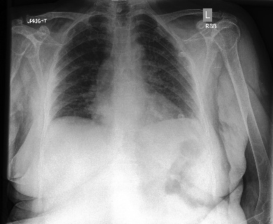

In [7]:
image